In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid",
        rc={"figure.figsize":(12,8), 
            "axes.labelsize":14, 
            "xtick.labelsize":12, 
            "ytick.labelsize":12})

from sklearn.cluster import MeanShift

In [2]:
train = pd.read_csv("../data/train.csv")
train.shape

(1460, 81)

In [3]:
# Convert Neighborhood names to numbers
names = sorted(set(train["Neighborhood"].values))
num = range(0, len(names))
names_to_num = dict(zip(names, num))
nghd = train["Neighborhood"].map(names_to_num)
names_to_num

{'Blmngtn': 0,
 'Blueste': 1,
 'BrDale': 2,
 'BrkSide': 3,
 'ClearCr': 4,
 'CollgCr': 5,
 'Crawfor': 6,
 'Edwards': 7,
 'Gilbert': 8,
 'IDOTRR': 9,
 'MeadowV': 10,
 'Mitchel': 11,
 'NAmes': 12,
 'NPkVill': 13,
 'NWAmes': 14,
 'NoRidge': 15,
 'NridgHt': 16,
 'OldTown': 17,
 'SWISU': 18,
 'Sawyer': 19,
 'SawyerW': 20,
 'Somerst': 21,
 'StoneBr': 22,
 'Timber': 23,
 'Veenker': 24}

In [4]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
LogSalePrice = np.log(train["SalePrice"])
LogSalePrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

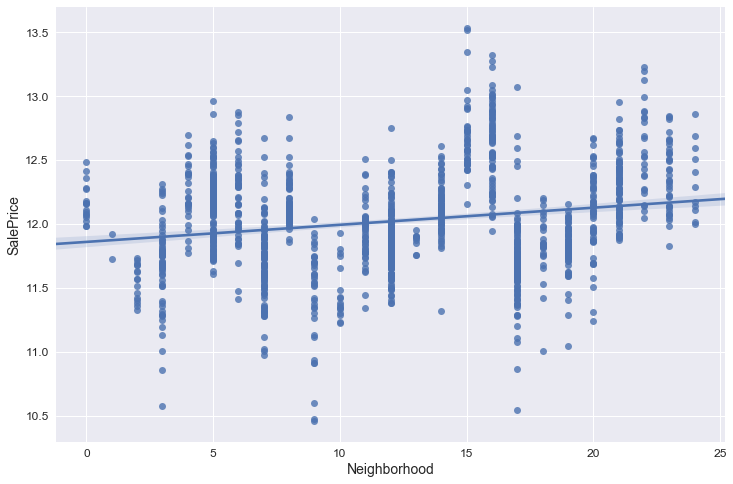

In [7]:
sns.regplot(x=nghd, y=LogSalePrice);

In [8]:
data = np.array(zip(nghd, LogSalePrice))
data

array([[  5.        ,  12.24769432],
       [ 24.        ,  12.10901093],
       [  5.        ,  12.31716669],
       ..., 
       [  6.        ,  12.49312952],
       [ 12.        ,  11.86446223],
       [  7.        ,  11.90158345]])

## Mean-Shift Clustering

In [9]:
# Run mean-shift clustering algorithm on data
ms = MeanShift()
ms.fit(data)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [10]:
# Cluster labels as determined by mean-shift
labels = ms.labels_
print labels

numClusters = len(np.unique(labels))
print("Number of estimated clusters : %d" % numClusters)

[2 3 2 ..., 2 0 2]
Number of estimated clusters : 4


In [11]:
# Centers of the 4 clusters
centers = ms.cluster_centers_
centers

array([[ 13.87734242,  12.02956321],
       [ 10.06007752,  11.84498686],
       [  5.97813121,  11.97276684],
       [ 18.12631579,  12.11538133]])

In [11]:
# Visualize the 4 clusters
trace0 = go.Scatter(x = nghd, 
                    y = LogSalePrice, 
                    mode = "markers", 
                    name = "", 
                    marker = dict(color = labels))
trace1 = go.Scatter(x = centers[:, 0], 
                    y = centers[:, 1], 
                    mode = "markers", 
                    name = "centers", 
                    marker = dict(size = 10, color = "rgba(1, 1, 1, 1)"))
py.iplot([trace0, trace1])

The Neighborhood clusters are [0, 8], [9, 11], [12, 15], [16, 24].

In [12]:
# Neighborhood name, number code, frequency
left = pd.DataFrame({"names": names, "num": num})
right = pd.DataFrame({"num": nghd.value_counts().keys(), "freq": nghd.value_counts().values})
pd.merge(left, right, on = "num")

,names,num,freq
0,Blmngtn,0,17
1,Blueste,1,2
2,BrDale,2,16
3,BrkSide,3,58
4,ClearCr,4,28
5,CollgCr,5,150
6,Crawfor,6,51
7,Edwards,7,100
8,Gilbert,8,79
9,IDOTRR,9,37
